# SymPy Investigation

## David John Wilson

This document is intended as a playground for me to get used to the SymPy package. This is an open source python package (associated with NumFocus) that allows for symbolic computation in python. As computer algebra is my personal speciality, I am intrigued to learn more about SymPy and hopefully contribute to it in the future. Hopefully I can one day help implement CAD (and consequently Quantifier Elimination fo the first order reals) for others to use!

### General Setup

To begin with we need to import the sympy library (in this case we just import everything from SymPy). We would also usually initialize printing, although I want to delay this a moment to show what init_printing does.

In [1]:
from sympy import *
#init_printing()

## 1. Basic symbols and expressions

Note that before we can use a string as a symbolic variable we need to declare it as one. This can be done quite simply, and we can write out expressions.

In [2]:
x = symbols('x')
exp(x)*sin(x) + exp(x)*cos(x)

exp(x)*sin(x) + exp(x)*cos(x)

If we initialize printing then we get a much prettier output. (I am unsure why we get a stray pipe character '|' at the end of the output!).

In [5]:
init_printing()

In [6]:
exp(x)*sin(x) + exp(x)*cos(x)

Let us save this expression into a variable so that we can use it in the future.

In [7]:
f_exp = exp(x)*sin(x) + exp(x)*cos(x)

We can do many straightforward procedures such as factoring. This will pull out the exponential term from the expression.

In [8]:
factor(f_exp)

SymPy can be much smarter than this though! If we simply ask SymPy to simplify the expression it produces a new way to write f_exp.

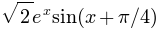

In [9]:
simplify(f_exp)

The process of simplifying symbolic expressions is a surprisingly complicated one, that does not have a simple (pardon the pun) solution. For an example of this, see the aside below.

Note, that using simplify or factor does not change f_exp. If we ask to print f_exp again we get the same expressionas before. 

In [10]:
f_exp

In [11]:
integrate(f_exp,x)

#### Aside: Simplification

Function simplification seems like it should be, well, simple. After all it is usually really easy to tell a simple mathematical expression from a complicated one.

Let's start with a trivial example. Which of the following expressions below is the simplest?
```
1000/100, 10, 1234567890/123456789, 2^3*3^7*5^8/2^2*3^7*5^7, 10*1*1
```

I think it's fairly obvious the answer is the second entry. It would seem sensible to use this to build out a couple of rules for simplifying fractions: if the denominator divides the numerator, do so, and then remove any superfluous unit multiplications.

We could easily think of expanding this to fractions, and it may initially seem a smart idea:

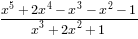

In [12]:
frac = (x**5+2*x**4-x**3-x**2-1)/(x**3+2*x**2+1)
frac

This not particularly nice looking fraction simplifies down to a much more elegant expression:

In [13]:
x**2-1

So far, so simple. But what happens when we're faced with something a little more subtle? What about dividing `x**n-1` by `x-1`. We know that for all integer `n` greater than 0 this division is exact; so we should just divide straight away, right? 

Letting `n=2`, this seems obvious. The second expression is clearly simpler:

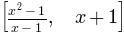

In [14]:
[(x**2-1)/(x-1),x+1]

Indeed, when we ask SymPy to simplify the expression they give us precisely that:

In [15]:
simplify((x**2-1)/(x-1))

But what about a bigger expression? What if `n=100`?

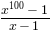

In [16]:
(x**100-1)/(x-1)

If we ask SymPy to simplify this expression it simply leaves it alone. Why is that?

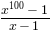

In [17]:
simplify((x**100-1)/(x-1))

Well, if we did the exact division as we might want to, then we get the following expression:

In [18]:
g = 0
for i in xrange(100):
    g+=x**i
g

This certainly wouldn't be considered 'simpler' than the fraction by most people. If nothing else, the number of terms in the expression (100) is much larger than the number of terms in the fraction (4). 

But we can't even use number of terms to choose! When `n=4` the number of terms (and, in fact, the number of operators) is the same for both expressions. In this case, SymPy decides to leave the expression as a fraction (whilst for `n<4` it conducts the division).

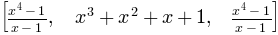

In [19]:
[(x**4-1)/(x-1),x**3+x**2+x**1+1,simplify((x**4-1)/(x-1))]

So if you're using simplify and getting frustrated that it isn't working as you expect it to, remember that it is a much more difficult problem than you may think!

## 2. Solving expressions

We now move onto one of the most important and often-used features of a symbolic computation or computer algebra system: solving expressions. 

We start by trying to solve possibly the most famous equation of them all: the quadratic equation. Remember that we need to define symbols for all terms involved in our expression.

In [20]:
a,b,c = symbols('a b c')

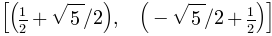

In [21]:
solve([x**2-x-1],x)

In [22]:
solve([x**2-x-1],x)[0][0].evalf(500)

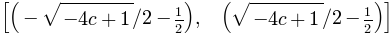

In [23]:
solve([x**2+x+c],x)

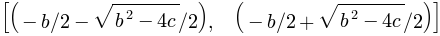

In [24]:
solve([x**2+b*x+c],x)

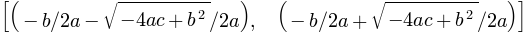

In [25]:
solve([a*x**2+b*x+c],x)